IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
import numpy as np

ModuleNotFoundError: No module named 'keras'

LOADING DATA

In [1]:
raw_data = pd.read_csv('C:/Users/ronin/Google Drive/IAS ML MODEL/ML MODELLING/1500-1800-1.33-1.5.csv')
# print(raw_data.info())

NameError: name 'pd' is not defined

In [4]:
raw_data.columns =['REF'] + [''] * (len(raw_data.columns)-1) #making REF column of refractive index which is our LABEL

raw_data.head()

,REF,,,,,,,,,,...,,,,,,,,,,
0,1.3334,0.005599,0.005607,0.005619,0.005636,0.005658,0.005685,0.005718,0.005758,0.005805,...,0.006759,0.006558,0.006369,0.006191,0.006022,0.005862,0.005710,0.005565,0.005427,0.005294
1,1.3351,0.005589,0.005596,0.005606,0.005622,0.005642,0.005667,0.005698,0.005735,0.005779,...,0.006777,0.006576,0.006386,0.006208,0.006039,0.005878,0.005726,0.005580,0.005441,0.005309
2,1.3368,0.005579,0.005584,0.005594,0.005608,0.005626,0.005649,0.005678,0.005713,0.005754,...,0.006795,0.006593,0.006403,0.006224,0.006055,0.005894,0.005741,0.005596,0.005456,0.005323
3,1.3385,0.005569,0.005573,0.005582,0.005594,0.005611,0.005633,0.005659,0.005692,0.005731,...,0.006813,0.006611,0.006421,0.006241,0.006071,0.005910,0.005757,0.005611,0.005472,0.005338
4,1.3402,0.005559,0.005563,0.005570,0.005581,0.005597,0.005617,0.005642,0.005672,0.005709,...,0.006832,0.006629,0.006438,0.006259,0.006088,0.005927,0.005773,0.005627,0.005487,0.005353


PLOTTING A ROW

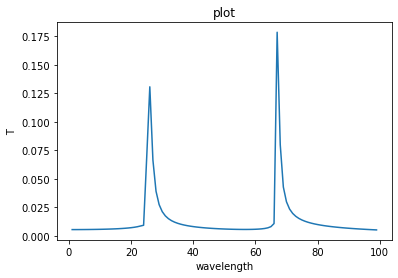

In [5]:
# r2 = raw_data.iloc[:,1:]
x = list(range(1, 100))
y = raw_data.iloc[1,1:]
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('wavelength')
# naming the y axis
plt.ylabel('T')
  
# giving a title to my graph
plt.title('plot')
  
# function to show the plot
plt.show()

In [6]:
y = raw_data['REF'] #Y is our label vector
raw_data.drop(['REF'], axis=1, inplace=True)
print(y)

0     1.3334
1     1.3351
2     1.3368
3     1.3385
4     1.3402
       ...  
94    1.4932
95    1.4949
96    1.4966
97    1.4983
98    1.5000
Name: REF, Length: 99, dtype: float64


SPLITTING TO TRAIN AND TEST DATA

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size=0.1, random_state=42)
X_train.shape

(89, 99)

In [41]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

from numpy import array
datax = array(X_train)
dataxt = array(X_test)


# train_data_reshaped = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
train_data_reshaped = datax.reshape(sample_size,time_steps,input_dimension)
# print("After reshape train data set shape:\n", train_data_reshaped.shape)
# print("1 Sample shape:\n",train_data_reshaped[0].shape)
# print("An example sample:\n", train_data_reshaped[0])
test_data_reshaped = dataxt.reshape(dataxt.shape[0],dataxt.shape[1],1)



APPLYING cnn

In [43]:
def build_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 93, 64)            512       
_________________________________________________________________
dropout (Dropout)            (None, 93, 64)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 91, 32)            6176      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 90, 16)            1040      
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 45, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)               

TRAINING

In [57]:
# Store training stats
history = model_conv1D.fit(train_data_reshaped, y_train, epochs=500,
                    validation_split=0.2, verbose=1)

Epoch 1/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0035 - mae: 0.0493 - val_loss: 0.0026 - val_mae: 0.0445
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0181 - mae: 0.1259 - val_loss: 0.0445 - val_mae: 0.2051
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.1313 - val_loss: 0.0028 - val_mae: 0.0461
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0067 - mae: 0.0704 - val_loss: 0.0291 - val_mae: 0.1632
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0108 - mae: 0.0949 - val_loss: 0.0025 - val_mae: 0.0445
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0862 - val_loss: 0.0623 - val_mae: 0.2451
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0251 - mae: 0.1502 - val_loss: 0.0024 - val_mae: 0.0438
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.062

Epoch 125/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - mae: 0.0538 - val_loss: 0.0014 - val_mae: 0.0356
Epoch 126/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0755 - val_loss: 0.0102 - val_mae: 0.1005
Epoch 127/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0059 - mae: 0.0759 - val_loss: 0.0018 - val_mae: 0.0378
Epoch 128/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0049 - mae: 0.0686 - val_loss: 0.0107 - val_mae: 0.1015
Epoch 129/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0058 - mae: 0.0750 - val_loss: 0.0017 - val_mae: 0.0376
Epoch 130/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0754 - val_loss: 0.0124 - val_mae: 0.1105
Epoch 131/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0760 - val_loss: 0.0025 - val_mae: 0.0480
Epoch 132/500
3/3 [==============================] - 0s 11ms/step - loss: 0.006

3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mae: 0.0601 - val_loss: 0.0031 - val_mae: 0.0548
Epoch 250/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0053 - mae: 0.0721 - val_loss: 0.0056 - val_mae: 0.0714
Epoch 251/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0029 - mae: 0.0516 - val_loss: 0.0017 - val_mae: 0.0371
Epoch 252/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0030 - mae: 0.0535 - val_loss: 0.0084 - val_mae: 0.0885
Epoch 253/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - mae: 0.0766 - val_loss: 0.0026 - val_mae: 0.0498
Epoch 254/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0041 - mae: 0.0635 - val_loss: 0.0058 - val_mae: 0.0752
Epoch 255/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0032 - mae: 0.0553 - val_loss: 0.0017 - val_mae: 0.0399
Epoch 256/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0029 - mae: 0.0530 

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0382 - val_loss: 0.0019 - val_mae: 0.0410
Epoch 374/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - mae: 0.0509 - val_loss: 0.0075 - val_mae: 0.0860
Epoch 375/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0057 - mae: 0.0749 - val_loss: 0.0026 - val_mae: 0.0507
Epoch 376/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0034 - mae: 0.0578 - val_loss: 0.0028 - val_mae: 0.0523
Epoch 377/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0015 - mae: 0.0374 - val_loss: 5.7120e-04 - val_mae: 0.0228
Epoch 378/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0357 - val_loss: 0.0043 - val_mae: 0.0640
Epoch 379/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0040 - mae: 0.0620 - val_loss: 0.0028 - val_mae: 0.0479
Epoch 380/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0029 - mae: 0

3/3 [==============================] - 0s 11ms/step - loss: 0.0036 - mae: 0.0586 - val_loss: 0.0011 - val_mae: 0.0322
Epoch 436/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0396 - val_loss: 0.0016 - val_mae: 0.0380
Epoch 437/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0014 - mae: 0.0367 - val_loss: 0.0018 - val_mae: 0.0418
Epoch 438/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0536 - val_loss: 0.0048 - val_mae: 0.0687
Epoch 439/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0032 - mae: 0.0556 - val_loss: 0.0012 - val_mae: 0.0339
Epoch 440/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0023 - mae: 0.0473 - val_loss: 0.0040 - val_mae: 0.0620
Epoch 441/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0026 - mae: 0.0499 - val_loss: 0.0017 - val_mae: 0.0402
Epoch 442/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.055

process

In [67]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mae'])])
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

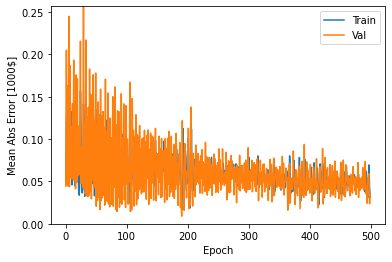

In [59]:
plot_history(history)

PREDICTATED VALUES

In [65]:
[loss, mae] = model_conv1D.evaluate(test_data_reshaped, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $   0.00


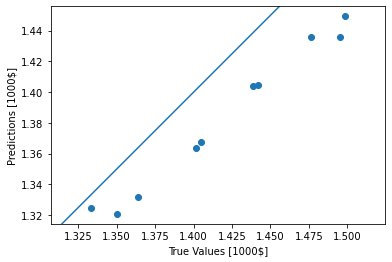

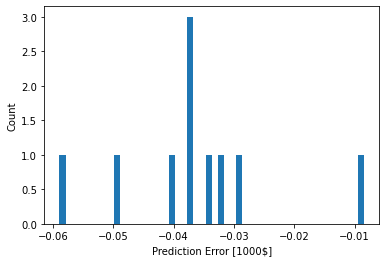

In [69]:
test_predictions = model_conv1D.predict(test_data_reshaped).flatten()
plot_prediction(y_test, test_predictions)